In [1]:
!virtualenv -p python3 virtualenvironment
!source virtualenvironment/bin/activate
!pip install ta
!pip install -U finance-datareader
!pip install --upgrade finance-datareader
!pip install pykrx
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

/bin/bash: virtualenv: command not found
/bin/bash: virtualenvironment/bin/activate: No such file or directory
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache co

In [25]:
import FinanceDataReader as fdr

# KRX 시가총액 상위 10개 기업 코드 리스트
df_krx = fdr.StockListing('KRX')
krx10_stocks_code = df_krx["Code"].head(10).tolist()
print(krx10_stocks_code)

['005930', '373220', '000660', '207940', '051910', '006400', '005935', '005380', '000270', '005490']


In [26]:
#시작일, 종료일 설정
start_date = '2020-01-01'
end_date = '2022-12-31'
krx10_stocks = {}
for code in krx10_stocks_code:
    krx10_stocks[code] = fdr.DataReader(code, start_date, end_date)
#'005930(삼성전자) 데이터 확인
krx10_stocks['005930']

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753
2020-01-03,56000,56600,54900,55500,15422255,0.005435
2020-01-06,54900,55600,54600,55500,10278951,0.000000
2020-01-07,55700,56400,55600,55800,10009778,0.005405
2020-01-08,56200,57400,55900,56800,23501171,0.017921
...,...,...,...,...,...,...
2022-12-23,58200,58400,57700,58100,9829407,-0.016920
2022-12-26,58000,58100,57700,57900,6756411,-0.003442
2022-12-27,58000,58400,57900,58100,10667027,0.003454


In [27]:
#이동평균선 추가 작업
for code in krx10_stocks_code:
  ma = [5,20,60,120]
  for days in ma:
    krx10_stocks[code]['ma_'+str(days)] = krx10_stocks[code]['Close'].rolling(window = days).mean()
    krx10_stocks[code] = krx10_stocks[code].dropna()

#'005930(삼성전자) 데이터 확인
krx10_stocks['005930']

<ipython-input-27-a164e243bb99>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  krx10_stocks[code]['ma_'+str(days)] = krx10_stocks[code]['Close'].rolling(window = days).mean()


,Open,High,Low,Close,Volume,Change,ma_5,ma_20,ma_60,ma_120
Date,,,,,,,,,,
2020-10-26,60400,61100,60100,60400,13268226,0.003322,60500.0,59610.0,58288.333333,55167.500000
2020-10-27,60300,60300,59500,59800,17260416,-0.009934,60280.0,59670.0,58308.333333,55261.666667
2020-10-28,59400,59400,58800,59000,14428882,-0.013378,59900.0,59730.0,58308.333333,55343.333333
2020-10-29,58200,58500,57500,58100,22636966,-0.015254,59500.0,59740.0,58293.333333,55420.833333
2020-10-30,58000,58000,56600,56600,26907844,-0.025818,58780.0,59660.0,58271.666667,55485.833333
...,...,...,...,...,...,...,...,...,...,...
2022-12-23,58200,58400,57700,58100,9829407,-0.016920,58660.0,59785.0,59000.000000,58887.500000
2022-12-26,58000,58100,57700,57900,6756411,-0.003442,58340.0,59675.0,59088.333333,58894.166667
2022-12-27,58000,58400,57900,58100,10667027,0.003454,58240.0,59550.0,59171.666667,58901.666667


In [28]:
#모든 보조지표 추가
import pandas as pd
from ta import add_all_ta_features
from ta.utils import dropna


#for code in krx10_stocks_code:
krx10_stocks['005930'] = add_all_ta_features(krx10_stocks['005930'], open="Open", high="High", low="Low", close="Close", volume="Volume", fillna=True)
#'005930(삼성전자) 데이터 확인
krx10_stocks['005930']


/usr/local/lib/python3.9/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.9/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)


,Open,High,Low,Close,Volume,Change,ma_5,ma_20,ma_60,ma_120,...,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_dlr,others_cr
Date,,,,,,,,,,,,,,,,,,,,,
2020-10-26,60400,61100,60100,60400,13268226,0.003322,60500.0,59610.0,58288.333333,55167.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60400.000000,-15.193198,0.000000,0.000000
2020-10-27,60300,60300,59500,59800,17260416,-0.009934,60280.0,59670.0,58308.333333,55261.666667,...,-0.079302,-0.015860,-0.063442,2.347881,0.469576,1.878305,60397.502601,-0.993377,-0.998344,-0.993377
2020-10-28,59400,59400,58800,59000,14428882,-0.013378,59900.0,59730.0,58308.333333,55343.333333,...,-0.246676,-0.062024,-0.184653,2.483624,0.872386,1.611238,60391.685733,-1.337793,-1.346822,-2.317881
2020-10-29,58200,58500,57500,58100,22636966,-0.015254,59500.0,59740.0,58293.333333,55420.833333,...,-0.495359,-0.148691,-0.346668,7.030677,2.104044,4.926633,60382.146979,-1.525424,-1.537178,-3.807947
2020-10-30,58000,58000,56600,56600,26907844,-0.025818,58780.0,59660.0,58271.666667,55485.833333,...,-0.886972,-0.296347,-0.590625,12.190471,4.121329,8.069142,60366.404432,-2.581756,-2.615668,-6.291391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,58200,58400,57700,58100,9829407,-0.016920,58660.0,59785.0,59000.000000,58887.500000,...,-0.725561,-0.334985,-0.390576,-8.614888,-8.758809,0.143921,66320.387632,-1.692047,-1.706526,-3.807947
2022-12-26,58000,58100,57700,57900,6756411,-0.003442,58340.0,59675.0,59088.333333,58894.166667,...,-0.844903,-0.436969,-0.407934,-10.816245,-9.170296,-1.645949,66285.339192,-0.344234,-0.344828,-4.139073
2022-12-27,58000,58400,57900,58100,10667027,0.003454,58240.0,59550.0,59171.666667,58901.666667,...,-0.902300,-0.530035,-0.372265,-9.382121,-9.212661,-0.169460,66251.269102,0.345423,0.344828,-3.807947


In [29]:
from pykrx import stock
from pykrx import bond

#거래주체별 거래대금 추가 작업
for code in krx10_stocks_code:
   krx10_stocks[code]["individual_value"] = stock.get_market_trading_value_by_date(start_date, end_date, code)["개인"]
   krx10_stocks[code]["Institution_value"] = stock.get_market_trading_value_by_date(start_date, end_date, code)["기관합계"]
   krx10_stocks[code]["Other_corporations_value"] = stock.get_market_trading_value_by_date(start_date, end_date, code)["기타법인"]
   krx10_stocks[code]["Foreigner_value"] = stock.get_market_trading_value_by_date(start_date, end_date, code)["외국인합계"]
  
krx10_stocks['005930'].head()

,Open,High,Low,Close,Volume,Change,ma_5,ma_20,ma_60,ma_120,...,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_dlr,others_cr,individual_value,Institution_value,Other_corporations_value,Foreigner_value
Date,,,,,,,,,,,,,,,,,,,,,
2020-10-26,60400,61100,60100,60400,13268226,0.003322,60500.0,59610.0,58288.333333,55167.500000,...,0.000000,0.000000,60400.000000,-15.193198,0.000000,0.000000,-96320622500,41525258700,4756095300,50039268500
2020-10-27,60300,60300,59500,59800,17260416,-0.009934,60280.0,59670.0,58308.333333,55261.666667,...,0.469576,1.878305,60397.502601,-0.993377,-0.998344,-0.993377,148370857500,-163044983000,10100023200,4574102300
2020-10-28,59400,59400,58800,59000,14428882,-0.013378,59900.0,59730.0,58308.333333,55343.333333,...,0.872386,1.611238,60391.685733,-1.337793,-1.346822,-2.317881,205962251000,-121901153900,-6961982900,-77099114200
2020-10-29,58200,58500,57500,58100,22636966,-0.015254,59500.0,59740.0,58293.333333,55420.833333,...,2.104044,4.926633,60382.146979,-1.525424,-1.537178,-3.807947,428989509400,-264129749500,5556475500,-170416235400
2020-10-30,58000,58000,56600,56600,26907844,-0.025818,58780.0,59660.0,58271.666667,55485.833333,...,4.121329,8.069142,60366.404432,-2.581756,-2.615668,-6.291391,511250898500,-153205264600,5964619800,-364010253700


In [30]:
# 10일 전 가격보다 상승or하락했는지 분류

for code in krx10_stocks_code:
  krx10_stocks[code]['daily_change'] = (krx10_stocks[code]['Close'].shift(-10) - krx10_stocks[code]['Close'])
  krx10_stocks[code].loc[krx10_stocks[code]['daily_change'] > 0, 'label'] = 'Rising'
  krx10_stocks[code].loc[krx10_stocks[code]['daily_change'] <= -0, 'label'] = 'Falling'


krx10_stocks['005930']

,Open,High,Low,Close,Volume,Change,ma_5,ma_20,ma_60,ma_120,...,momentum_kama,others_dr,others_dlr,others_cr,individual_value,Institution_value,Other_corporations_value,Foreigner_value,daily_change,label
Date,,,,,,,,,,,,,,,,,,,,,
2020-10-26,60400,61100,60100,60400,13268226,0.003322,60500.0,59610.0,58288.333333,55167.500000,...,60400.000000,-15.193198,0.000000,0.000000,-96320622500,41525258700,4756095300,50039268500,-200.0,Falling
2020-10-27,60300,60300,59500,59800,17260416,-0.009934,60280.0,59670.0,58308.333333,55261.666667,...,60397.502601,-0.993377,-0.998344,-0.993377,148370857500,-163044983000,10100023200,4574102300,400.0,Rising
2020-10-28,59400,59400,58800,59000,14428882,-0.013378,59900.0,59730.0,58308.333333,55343.333333,...,60391.685733,-1.337793,-1.346822,-2.317881,205962251000,-121901153900,-6961982900,-77099114200,2300.0,Rising
2020-10-29,58200,58500,57500,58100,22636966,-0.015254,59500.0,59740.0,58293.333333,55420.833333,...,60382.146979,-1.525424,-1.537178,-3.807947,428989509400,-264129749500,5556475500,-170416235400,2900.0,Rising
2020-10-30,58000,58000,56600,56600,26907844,-0.025818,58780.0,59660.0,58271.666667,55485.833333,...,60366.404432,-2.581756,-2.615668,-6.291391,511250898500,-153205264600,5964619800,-364010253700,6600.0,Rising
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,58200,58400,57700,58100,9829407,-0.016920,58660.0,59785.0,59000.000000,58887.500000,...,66320.387632,-1.692047,-1.706526,-3.807947,3946153800,23550966200,-5667892400,-21829227600,NaN,NaN
2022-12-26,58000,58100,57700,57900,6756411,-0.003442,58340.0,59675.0,59088.333333,58894.166667,...,66285.339192,-0.344234,-0.344828,-4.139073,-72349420800,145476007500,-10696338200,-62430248500,NaN,NaN
2022-12-27,58000,58400,57900,58100,10667027,0.003454,58240.0,59550.0,59171.666667,58901.666667,...,66251.269102,0.345423,0.344828,-3.807947,-158600094700,267835843500,-19947770200,-89287978600,NaN,NaN


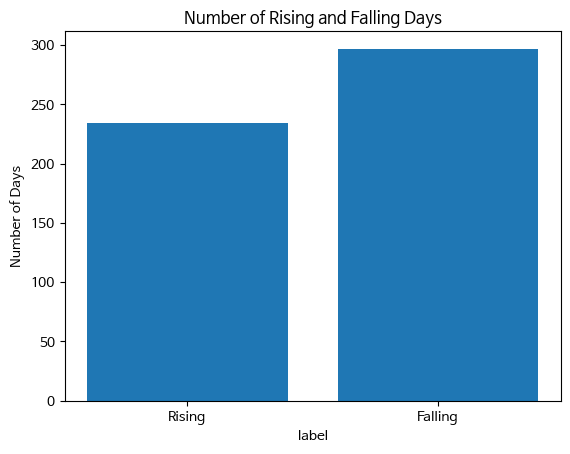

In [31]:
# 삼성전자 상승, 하락, 유지일수 시각화
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

rising_days = krx10_stocks['005930'][krx10_stocks['005930']['label'] == 'Rising'].shape[0]
falling_days = krx10_stocks['005930'][krx10_stocks['005930']['label'] == 'Falling'].shape[0]



plt.bar(['Rising', 'Falling'], [rising_days, falling_days])
plt.title('Number of Rising and Falling Days')
plt.xlabel('label')
plt.ylabel('Number of Days')
plt.show()

In [32]:
#불필요한 컬럼 제거
for code in krx10_stocks_code:
  krx10_stocks[code] = krx10_stocks[code].drop(['Open','High','Low','Close','Volume','Change','daily_change'],axis = 1).dropna()

krx10_stocks['005930']




,ma_5,ma_20,ma_60,ma_120,volume_adi,volume_obv,volume_cmf,volume_fi,volume_em,volume_sma_em,...,momentum_pvo_hist,momentum_kama,others_dr,others_dlr,others_cr,individual_value,Institution_value,Other_corporations_value,Foreigner_value,label
Date,,,,,,,,,,,,,,,,,,,,,
2020-10-26,60500.0,59610.0,58288.333333,55167.500000,-5.307290e+06,13268226,-0.400000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,60400.000000,-15.193198,0.000000,0.000000,-96320622500,41525258700,4756095300,50039268500,Falling
2020-10-27,60280.0,59670.0,58308.333333,55261.666667,-9.622394e+06,-3992190,-0.315192,-1.035625e+10,-3.244418e+06,-3.244418e+06,...,1.878305,60397.502601,-0.993377,-0.998344,-0.993377,148370857500,-163044983000,10100023200,4574102300,Rising
2020-10-28,59900.0,59730.0,58308.333333,55343.333333,-1.443202e+07,-18421072,-0.321015,-1.052580e+10,-3.326661e+06,-3.285539e+06,...,1.611238,60391.685733,-1.337793,-1.346822,-2.317881,205962251000,-121901153900,-6961982900,-77099114200,Rising
2020-10-29,59500.0,59740.0,58293.333333,55420.833333,-9.904629e+06,-41058038,-0.146530,-1.193258e+10,-4.859308e+06,-3.810129e+06,...,4.926633,60382.146979,-1.525424,-1.537178,-3.807947,428989509400,-264129749500,5556475500,-170416235400,Rising
2020-10-30,58780.0,59660.0,58271.666667,55485.833333,-3.681247e+07,-67965882,-0.389540,-1.599389e+10,-3.642061e+06,-3.768112e+06,...,8.069142,60366.404432,-2.581756,-2.615668,-6.291391,511250898500,-153205264600,5964619800,-364010253700,Rising
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-09,59600.0,60975.0,58296.666667,58789.166667,-9.891006e+08,-320267013,-0.006424,5.262607e+07,1.296342e+07,-1.083712e+06,...,1.122510,66624.792196,2.027027,2.006756,0.000000,-146017317600,136033162400,-1589914500,11574069700,Falling
2022-12-12,59440.0,60855.0,58355.000000,58795.833333,-9.951249e+08,-329303485,0.013254,-1.116724e+09,-1.659940e+06,-8.265906e+05,...,-0.698817,66595.136453,-1.490066,-1.501279,-1.490066,77321015500,-32785421400,-353965700,-44181628400,Falling
2022-12-13,59540.0,60720.0,58413.333333,58805.833333,-9.981385e+08,-320262612,-0.041414,-6.988814e+08,1.493219e+06,-8.421709e+05,...,-1.825679,66566.436613,0.336134,0.335571,-1.158940,1522828200,1317117600,796323500,-3636269300,Falling


In [33]:
krx10_stocks_data = krx10_stocks['005930'].drop(['label'], axis = 1)

,ma_5,ma_20,ma_60,ma_120,volume_adi,volume_obv,volume_cmf,volume_fi,volume_em,volume_sma_em,...,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_dlr,others_cr,individual_value,Institution_value,Other_corporations_value,Foreigner_value
Date,,,,,,,,,,,,,,,,,,,,,
2020-10-26,60500.0,59610.0,58288.333333,55167.500000,-5.307290e+06,13268226,-0.400000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,60400.000000,-15.193198,0.000000,0.000000,-96320622500,41525258700,4756095300,50039268500
2020-10-27,60280.0,59670.0,58308.333333,55261.666667,-9.622394e+06,-3992190,-0.315192,-1.035625e+10,-3.244418e+06,-3.244418e+06,...,0.469576,1.878305,60397.502601,-0.993377,-0.998344,-0.993377,148370857500,-163044983000,10100023200,4574102300
2020-10-28,59900.0,59730.0,58308.333333,55343.333333,-1.443202e+07,-18421072,-0.321015,-1.052580e+10,-3.326661e+06,-3.285539e+06,...,0.872386,1.611238,60391.685733,-1.337793,-1.346822,-2.317881,205962251000,-121901153900,-6961982900,-77099114200
2020-10-29,59500.0,59740.0,58293.333333,55420.833333,-9.904629e+06,-41058038,-0.146530,-1.193258e+10,-4.859308e+06,-3.810129e+06,...,2.104044,4.926633,60382.146979,-1.525424,-1.537178,-3.807947,428989509400,-264129749500,5556475500,-170416235400
2020-10-30,58780.0,59660.0,58271.666667,55485.833333,-3.681247e+07,-67965882,-0.389540,-1.599389e+10,-3.642061e+06,-3.768112e+06,...,4.121329,8.069142,60366.404432,-2.581756,-2.615668,-6.291391,511250898500,-153205264600,5964619800,-364010253700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-09,59600.0,60975.0,58296.666667,58789.166667,-9.891006e+08,-320267013,-0.006424,5.262607e+07,1.296342e+07,-1.083712e+06,...,-5.306305,1.122510,66624.792196,2.027027,2.006756,0.000000,-146017317600,136033162400,-1589914500,11574069700
2022-12-12,59440.0,60855.0,58355.000000,58795.833333,-9.951249e+08,-329303485,0.013254,-1.116724e+09,-1.659940e+06,-8.265906e+05,...,-5.481010,-0.698817,66595.136453,-1.490066,-1.501279,-1.490066,77321015500,-32785421400,-353965700,-44181628400
2022-12-13,59540.0,60720.0,58413.333333,58805.833333,-9.981385e+08,-320262612,-0.041414,-6.988814e+08,1.493219e+06,-8.421709e+05,...,-5.937429,-1.825679,66566.436613,0.336134,0.335571,-1.158940,1522828200,1317117600,796323500,-3636269300


In [34]:
krx10_stocks_target = krx10_stocks['005930']['label']
krx10_stocks_target

Date
2020-10-26    Falling
2020-10-27     Rising
2020-10-28     Rising
2020-10-29     Rising
2020-10-30     Rising
               ...   
2022-12-09    Falling
2022-12-12    Falling
2022-12-13    Falling
2022-12-14    Falling
2022-12-15    Falling
Name: label, Length: 531, dtype: object

In [35]:
# train data와 test data로 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(krx10_stocks_data, krx10_stocks_target, random_state=0)
print("X_train 크기:", X_train.shape)
print("y_train 크기:", y_train.shape)
print("X_test 크기:", X_test.shape)
print("y_test 크기:", y_test.shape)

X_train 크기: (398, 94)
y_train 크기: (398,)
X_test 크기: (133, 94)
y_test 크기: (133,)


In [36]:
# 데이터 전처리(MinMaxScaler)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
scaler.fit(X_test)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
#for i in range(94):
krx10_stocks['005930'].iloc[:,1]

Date
2020-10-26    59610.0
2020-10-27    59670.0
2020-10-28    59730.0
2020-10-29    59740.0
2020-10-30    59660.0
               ...   
2022-12-09    60975.0
2022-12-12    60855.0
2022-12-13    60720.0
2022-12-14    60610.0
2022-12-15    60505.0
Name: ma_20, Length: 531, dtype: float64

<ipython-input-38-5fbb2bc8a597>:16: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  fig.tight_layout()


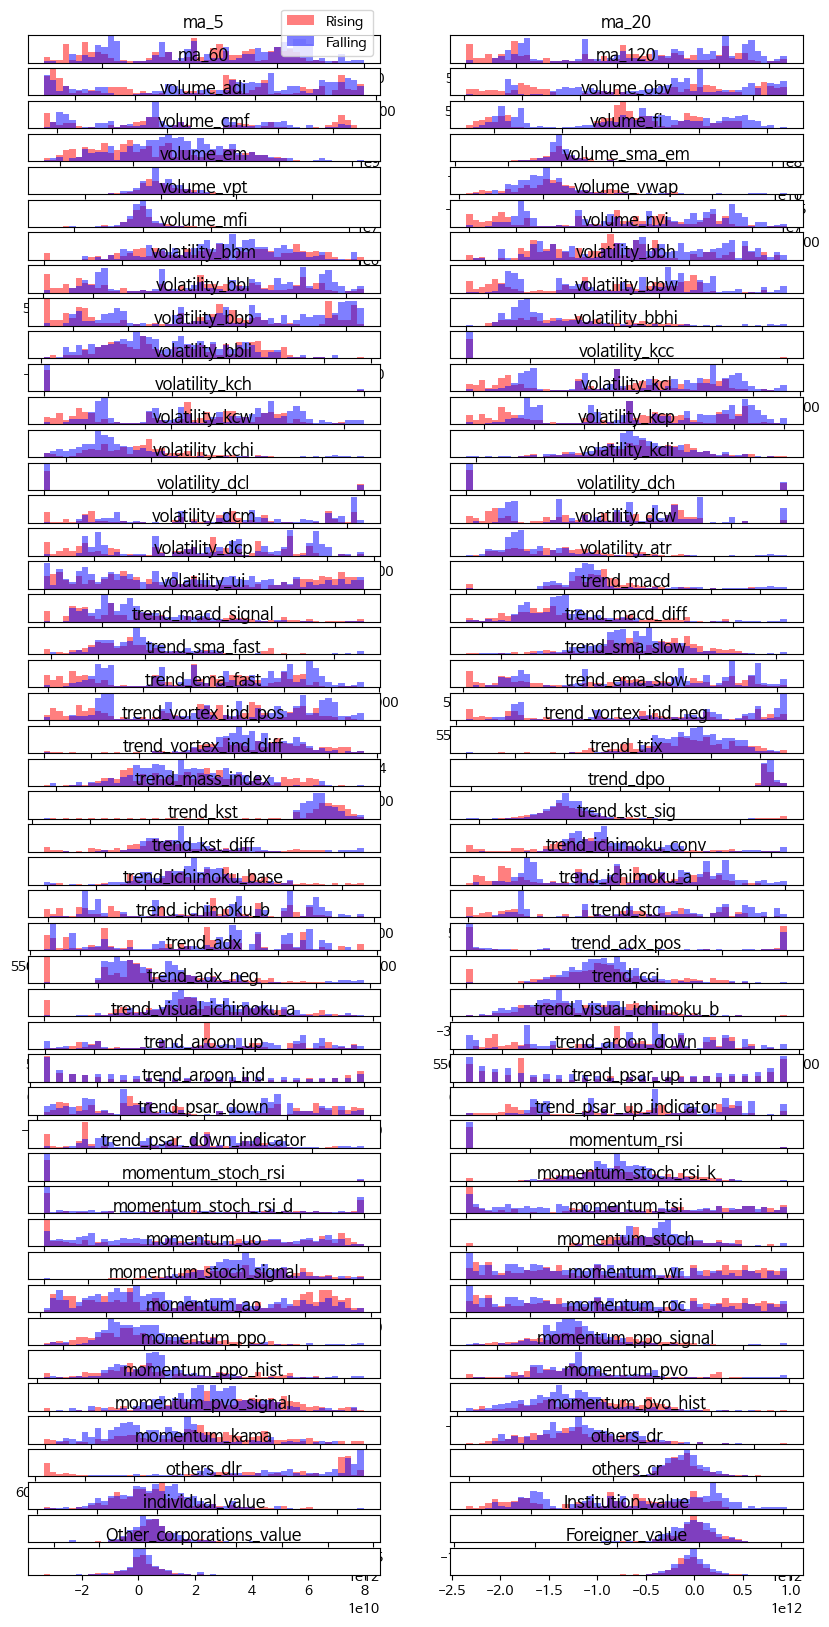

In [38]:
# 히스토그램으로 시각화
import numpy as np
fig, axes = plt.subplots(47, 2, figsize = (10, 20))
Rising = krx10_stocks['005930'][krx10_stocks['005930']['label'] == 'Rising']
Falling = krx10_stocks['005930'][krx10_stocks['005930']['label'] == 'Falling']

ax = axes.ravel()

for i in range(94):
  _, bins = np.histogram(krx10_stocks['005930'].iloc[:,i], bins = 50)
  ax[i].hist(Rising.iloc[:, i], bins = bins, color = 'r', alpha = 0.5)
  ax[i].hist(Falling.iloc[:, i], bins = bins, color = 'b', alpha = 0.5)
  ax[i].set_title(krx10_stocks['005930'].columns[i])
  ax[i].set_yticks(())
ax[0].legend(["Rising", "Falling"], loc = "best")
fig.tight_layout()

In [39]:
# 결정트리

from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.789


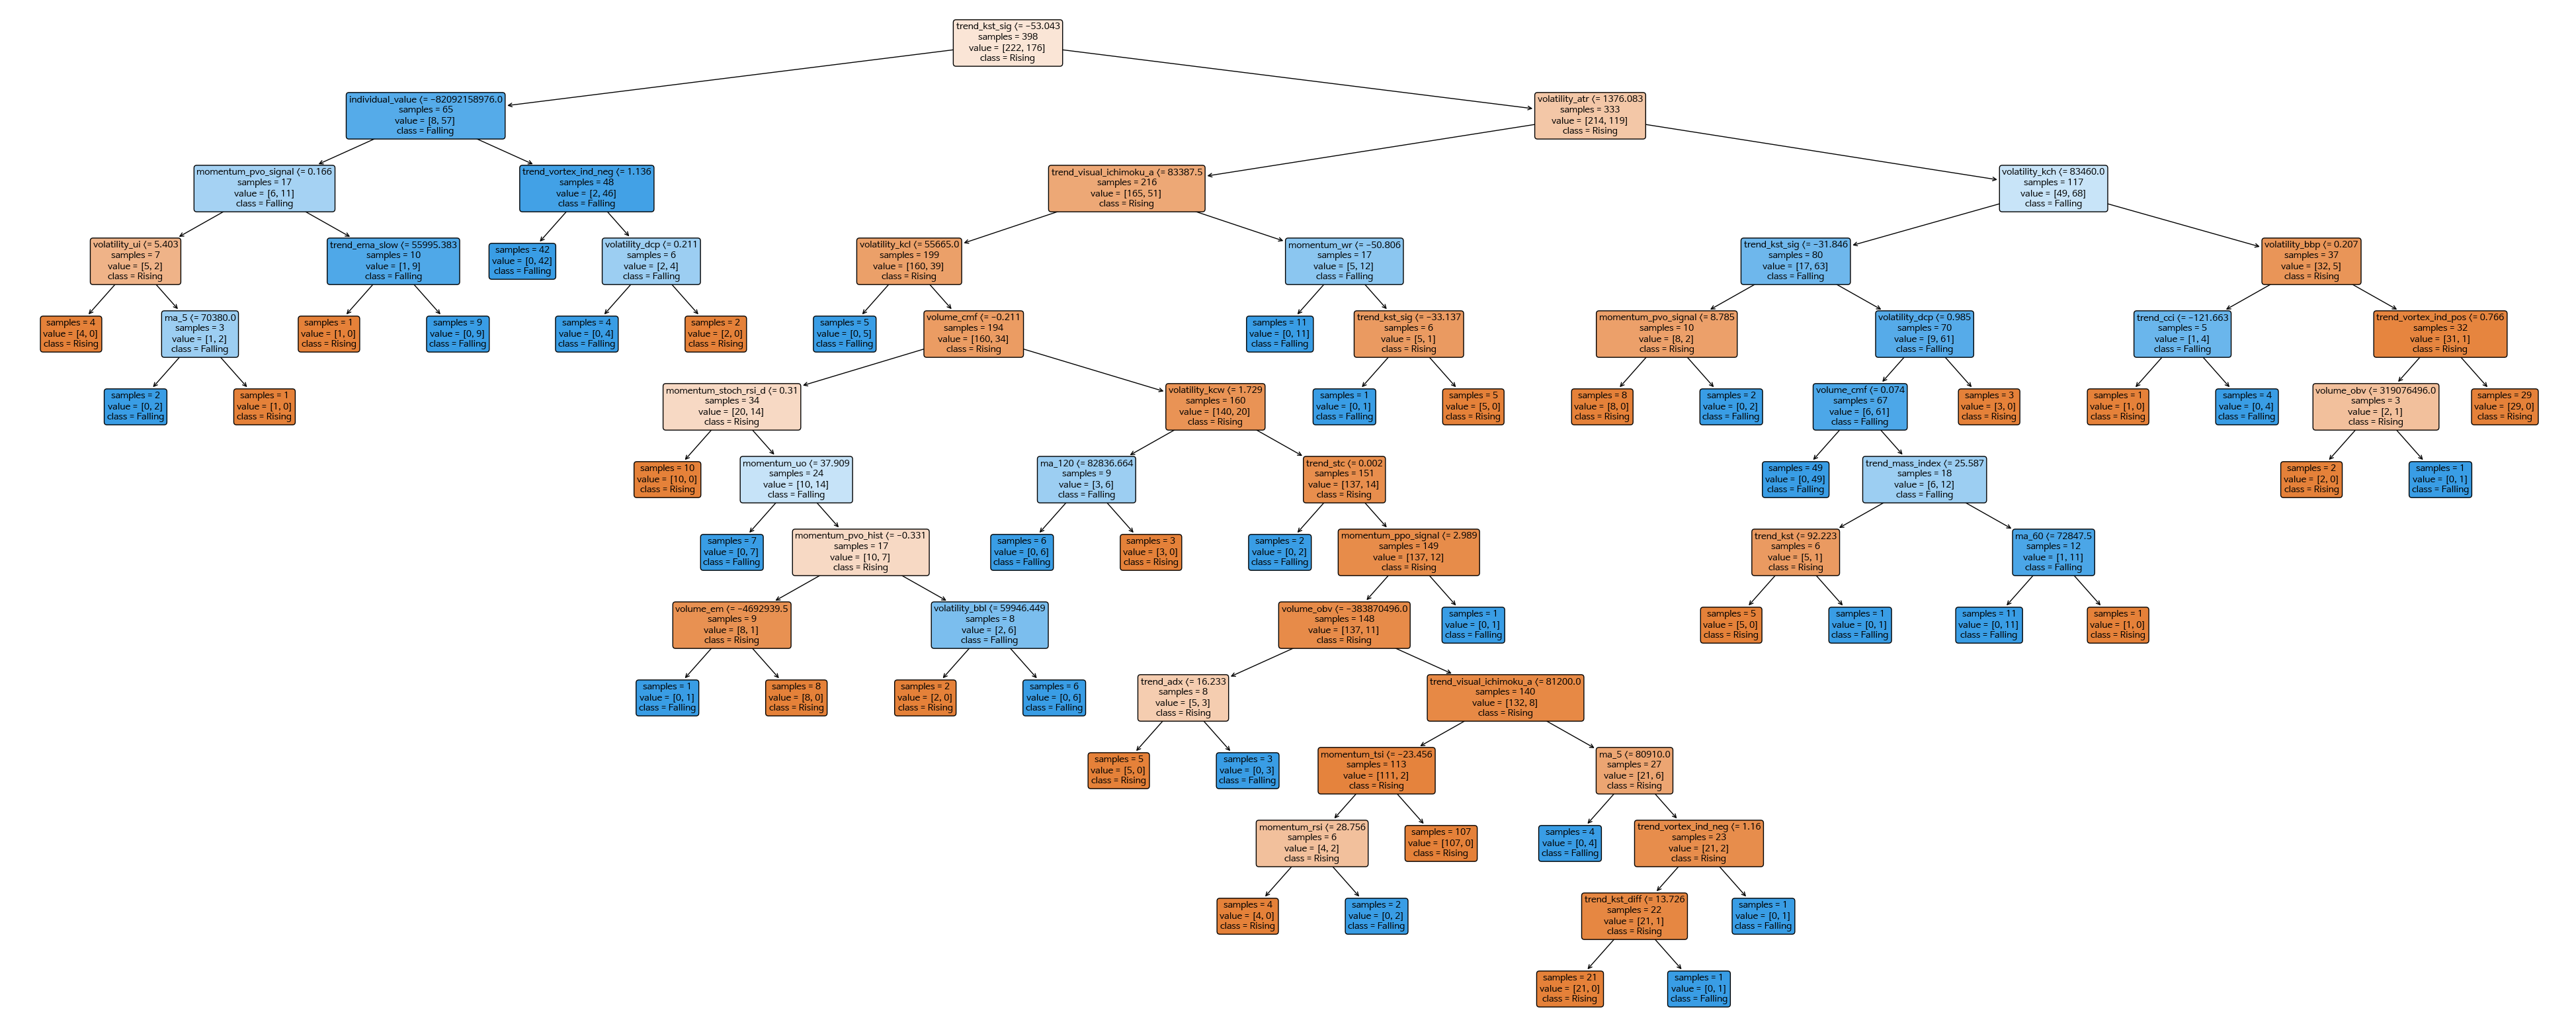

In [46]:
#트리 시각화
from sklearn.tree import plot_tree
plt.figure(figsize=(50,20))
plot_tree(tree, class_names=["Rising", "Falling"], feature_names = krx10_stocks['005930'].columns, impurity = False, filled = True, rounded = True, fontsize = 10)
plt.show()


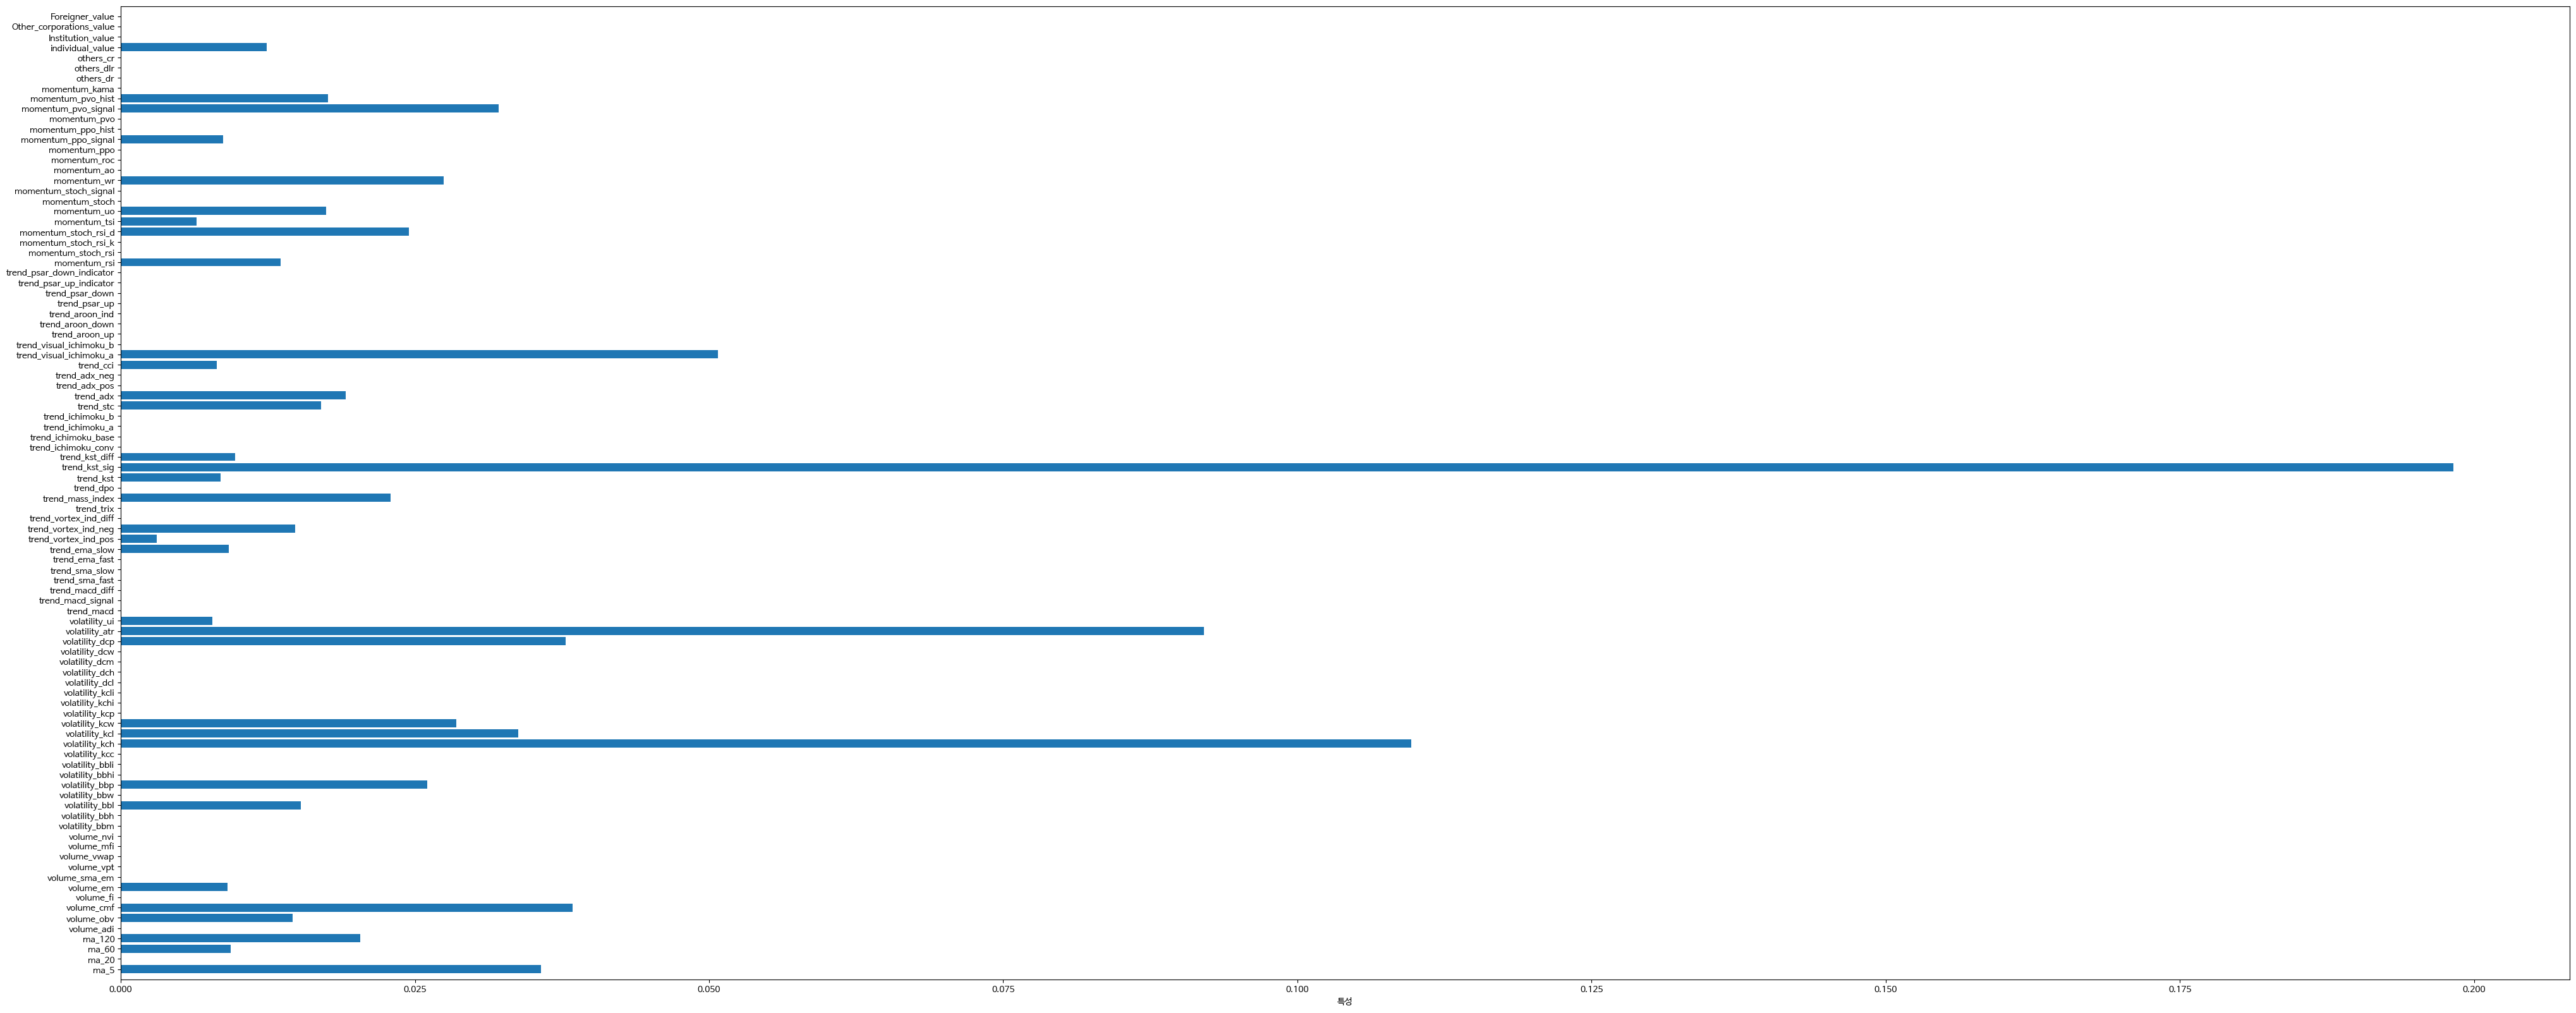

In [54]:
# 특성 중요도 시각화
def plot_feature_importances_stock(model):
  n_features = krx10_stocks_data.shape[1]
  plt.figure(figsize=(50,20))
  plt.barh(np.arange(n_features), model.feature_importances_, align = 'center')
  plt.yticks(np.arange(n_features),krx10_stocks_data.columns)
  plt.xlabel("특성 중요도")
  plt.xlabel("특성")
  plt.ylim(-1, n_features)

plot_feature_importances_stock(tree)
